<img src='https://www.kaggle.com/competitions/5407/images/header'>

  # <font color=red>PREDICT HOUSE PRICING</font>

 Başarılı bir ev fiyatı tahmini projesi gerçekleştirmek için 
İlk olarak, mevcut train ve test verilerini birleştireceğiz. Bu sayede, tüm veriyi kullanarak daha kapsamlı bir feature engineering süreci gerçekleştirebilecegiz.
  

Daha sonra, veriyi train ve test olarak yeniden ayıracağız. Train verisini kullanarak çeşitli makine öğrenmesi modellerini eğiteceğiz. Bu modellerin performanslarını test veri seti üzerinde değerlendirerek, en iyi sonucu veren modeli seçegi* z.

Seçilen en iyi modeli kaydedip, gerçek Kaggle veri seti üzerinde deneyeceğiz. Bu sayede, modelimizin gerçek dünyadaki performansını da gözlemleyecegiz.ğiz.

Bu proje sayesinde, veri analizi, feature engineering ve makine öğrenmesi konularındaki becerilerimizi geliştirme fırsatı bulacağız. Sonuçta, gerçek dünyadaki bir problemi başarılı bir şekilde çözmüşgolacağız.

## Data Dictionary

Id: Konutun benzersiz kimlik numarası

MSSubClass: Konutun yapı sınıfı

MSZoning: Konutun yer aldığı bölgedeki zoning sınıfı

LotFrontage: Taşınmazın cephe uzunluğu

LotArea: Taşınmazın alanı

Street: Taşınmazın bulunduğu yolun tipi

Alley: Taşınmazın bulunduğu sokak tipi

LotShape: Taşınmazın şekli

LandContour: Taşınmazın arazi kontur/eğimi

Utilities: Taşınmaza sağlanan hizmetler

LotConfig: Taşınmazın konumu (tek başına, bitişik, vb.)

LandSlope: Taşınmazın arazi eğimi

Neighborhood: Taşınmazın bulunduğu semt

Condition1: Taşınmazın birinci konumu

Condition2: Taşınmazın ikinci konumu

BldgType: Taşınmazın yapı tipi

HouseStyle: Taşınmazın mimari tarzı

OverallQual: Genel yapı kalitesi

OverallCond: Genel yapı durumu

YearBuilt: Taşınmazın inşa yılı

YearRemodAdd: Taşınmazın son yenileme/tadilat yılı

RoofStyle: Çatı tipi

RoofMatl: Çatı malzemesi

Exterior1st: Dış cephe birinci malzemesi

Exterior2nd: Dış cephe ikinci malzemesi

MasVnrType: Taş kaplamalı cephe tipi

MasVnrArea: Taş kaplamalı cephe alanı

ExterQual: Dış cephe kalitesi

ExterCond: Dış cephe durumu

Foundation: Temel tipi

BsmtQual: Bodrum katı kalitesi

BsmtCond: Bodrum katı durumu

BsmtExposure: Bodrum katının açıklığı

BsmtFinType1: Bodrum kat bitirme tipi 1

BsmtFinSF1: Bodrum kat bitirme alanı 1

BsmtFinType2: Bodrum kat bitirme tipi 2

BsmtFinSF2: Bodrum kat bitirme alanı 2

BsmtUnfSF: Bodrum kat bitişik olmayan alanı

TotalBsmtSF: Toplam bodrum kat alanı

Heating: Isıtma sistemi tipi

HeatingQC: Isıtma sistemi kalitesi

CentralAir: Merkezi havalandırma olup olmadığı

Electrical: Elektrik sistemi

1stFlrSF: 1. kat alanı

2ndFlrSF: 2. kat alanı

LowQualFinSF: Düşük kaliteli bitirilen alan

GrLivArea: Toplam yaşam alanı

BsmtFullBath: Tam banyolu bodrum kat sayısı

BsmtHalfBath: Yarım banyolu bodrum kat sayısı

FullBath: Tam banyo sayısı

HalfBath: Yarım banyo sayısı

BedroomAbvGr: Zemin kattaki yatak odası sayısı

KitchenAbvGr: Zemin kattaki mutfak sayısı

KitchenQual: Mutfak kalitesi

TotRmsAbvGrd: Zemin kattaki toplam oda sayısı

Functional: Fonksiyonellik derecesi

Fireplaces: Şömine sayısı

FireplaceQu: Şömine kalitesi

GarageType: Garaj tipi

GarageYrBlt: Garaj inşa yılı

GarageFinish: Garaj bitirme durumu

GarageCars: Garaj araç kapasitesi

GarageArea: Garaj alanı

GarageQual: Garaj kalitesi

GarageCond: Garaj durumu

PavedDrive: Parke yol olup olmadığı

WoodDeckSF: Ahşap güverte alanı

OpenPorchSF: Açık veranda alanı

EnclosedPorch: Kapalı veranda alanı

3SsnPorch: 3 mevsim kullanılan veranda alanı

ScreenPorch: Camlı veranda alanı

PoolArea: Havuz alanı

PoolQC: Havuz kalitesi

Fence: Çit tipi

MiscFeature: Diğer özellikler

MiscVal: Diğer özelliklerin değeri

MoSold: Satış ayı

YrSold: Satış yılı

SaleType: Satış tipi

SaleCondition: Satış durumu

SalePrice: Satış fiyatı

In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

# <font color=red>Train ve Test datasına EDA</font>

In [3]:
df1=pd.read_csv('train (1).csv')

In [4]:
df1.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [5]:
df1.shape

(1460, 81)

In [6]:
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df2=pd.read_csv('test (1).csv')

In [8]:
df2.shape

(1459, 80)

In [9]:
df2.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
y=df1['SalePrice']
# hedefi başta belirledim çümkü bu sutunu sileceğim modellerken test için buradan çekip yükleyeceğim,öbür türlü data satırlarında uyumsuzluk oldu.

In [12]:
df=pd.concat([df1,df2])

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [14]:
df.shape

(2919, 81)

In [15]:
2721/2919 # Alley sutunundaki nan veriri dataya böldüm,%93ü boş

0.9321685508735869

In [17]:
# Alley bu sutunun %93 ü boş ,siliyorum
# PoolQC , Fence , MiscFeature sutunlarıda aynı şekilde
# del df ['Alley','PoolQC','Fence','MiscFeature'] bukod çalışmadı nednese
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [18]:
# NaN değerleri içeren sütunları bulma
nan_columns = df.columns[df.isna().any()].tolist()
# NaN değerleri içeren sütunları yazdırma
print("NaN değerleri olan sütunlar:")
for col in nan_columns:
    print(col)

NaN değerleri olan sütunlar:
MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Electrical
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
SaleType
SalePrice


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [20]:
# Kategorik sütunları bulma
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Kategorik sütunları yazdırma
print("Kategorik sütunlar:")
for col in categorical_cols:
    print(col)

Kategorik sütunlar:
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


# <font color=red>FEATURE ENGINEERİNG</font>

In [21]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [22]:
# df MSZoning özelliğindeki nan değerleri None ile doldur
df['MSZoning'] = df['MSZoning'].fillna('None')

In [23]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
None          4
Name: count, dtype: int64

In [24]:
df['MSZoning']=df['MSZoning'].map({'C (all)':0, 'RH':1, 'FV':2, 'RM':3, 'RL':4,'None':5})

In [25]:
abs(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)) #Sutunun değerini büyükten küçüğe sıraladı.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
MSZoning         0.183642
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr

In [27]:
df['LotFrontage'].value_counts(normalize=True)

LotFrontage
60.0     0.113440
80.0     0.056309
70.0     0.054665
50.0     0.048089
75.0     0.043157
65.0     0.038224
85.0     0.031237
21.0     0.020551
24.0     0.020140
63.0     0.019318
90.0     0.018907
78.0     0.018907
68.0     0.018085
64.0     0.017674
74.0     0.016030
72.0     0.016030
73.0     0.013564
62.0     0.012741
79.0     0.011508
100.0    0.011508
82.0     0.011508
52.0     0.011508
51.0     0.011097
59.0     0.011097
57.0     0.010686
66.0     0.010686
76.0     0.010275
55.0     0.009864
53.0     0.009864
43.0     0.009453
88.0     0.009042
67.0     0.009042
69.0     0.008220
35.0     0.007809
71.0     0.007809
56.0     0.007809
44.0     0.007809
84.0     0.007398
81.0     0.007398
58.0     0.006987
61.0     0.006987
48.0     0.006576
40.0     0.006576
34.0     0.006576
86.0     0.006165
92.0     0.006165
95.0     0.006165
110.0    0.006165
77.0     0.006165
41.0     0.005754
120.0    0.005754
91.0     0.005754
96.0     0.005754
83.0     0.005343
93.0     0.00534

In [28]:
df['LotFrontage'].min(),df['LotFrontage'].max(),df['LotFrontage'].std(),df['LotFrontage'].var(),df['LotFrontage'].mean(),

(21.0, 313.0, 23.34490470692737, 544.9845757755196, 69.30579531442663)

In [29]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [30]:
df['Utilities'].value_counts()
# altyapı ,1 tane yok

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [31]:
df['Utilities'] = df['Utilities'].fillna('AllPub')

In [32]:
df['Utilities']=df['Utilities'].map({'AllPub':0, 'NoSeWa':1})

In [33]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [34]:
df['Exterior1st'] = df['Exterior1st'].fillna('None')

In [35]:
df['Exterior1st']=df['Exterior1st'].map({'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12, 'CBlock':13, 'ImStucc':14, 'None':15})

In [36]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [37]:
df['Exterior2nd'] = df['Exterior2nd'].fillna('None')

In [38]:
df['Exterior2nd']=df['Exterior2nd'].map({'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'Brk Cmn':10,'ImStucc':11, 'Stone':12, 'AsphShn':13, 'CBlock':14, 'Other':15, 'None':16})

In [39]:
df['MasVnrType'].value_counts()
# %60 ı boştu

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [40]:
df['MasVnrType'].value_counts(normalize=True)

MasVnrType
BrkFace    0.762359
Stone      0.215958
BrkCmn     0.021683
Name: proportion, dtype: float64

In [41]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [42]:
df['MasVnrType']=df['MasVnrType'].map({'None':0, 'BrkFace':1, 'Stone':2, 'BrkCmn':3})

In [43]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [44]:
df['FireplaceQu']=df['FireplaceQu'].fillna('None')

In [45]:
df['FireplaceQu']=df['FireplaceQu'].map({'None':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'Ex':5})

In [46]:
df = df.drop(['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)

In [47]:
df['BsmtQual'].value_counts()

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

In [48]:
df['BsmtQual']=df['BsmtQual'].fillna('None')

In [49]:
df['BsmtQual']=df['BsmtQual'].map({'None':0, 'TA':1, 'Gd':2, 'Ex':3, 'Fa':4})

In [50]:
df['BsmtCond'].value_counts()

BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

In [51]:
df['BsmtCond']=df['BsmtCond'].fillna('None')

In [52]:
df['BsmtCond']=df['BsmtCond'].map({'None':0, 'Po':1, 'Fa':2, 'Gd':3, 'TA':4})

In [53]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [54]:
df['KitchenQual']=df['KitchenQual'].fillna('None')

In [55]:
df['KitchenQual'].value_counts()

KitchenQual
TA      1492
Gd      1151
Ex       205
Fa        70
None       1
Name: count, dtype: int64

In [56]:
df['KitchenQual']=df['KitchenQual'].map({'None':0, 'Fa':1, 'Ex':2, 'Gd':3, 'TA':4})

In [57]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [58]:
df['Electrical']=df['Electrical'].fillna('None')

In [59]:
df['Electrical']=df['Electrical'].map({'None':0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

In [60]:
df['BsmtFullBath'].value_counts()

BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64

In [61]:
df['BsmtFullBath']=df['BsmtFullBath'].fillna('0')

In [62]:
# Sütunu float tipine dönüştürme çümkü obj görünüyor infoda
df['BsmtFullBath'] = df['BsmtFullBath'].astype(float)

In [63]:
df['GarageType'].value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

In [64]:
df['GarageType']=df['GarageType'].fillna('None')

In [65]:
df['GarageType']=df['GarageType'].map({'None':0, 'CarPort':1, '2Types':2, 'Basment':3, 'BuiltIn':4, 'Detchd':5, 'Attchd':6})

In [66]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())    

In [67]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64

In [68]:
df['GarageFinish']=df['GarageFinish'].fillna('None')

In [69]:
df['GarageFinish']=df['GarageFinish'].map({'None':0, 'Fin':1, 'RFn':2, 'Unf':3})

In [70]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean()) 

In [71]:
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean()) 

In [72]:
df['GarageQual'].value_counts()

GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64

In [73]:
df['GarageQual']=df['GarageQual'].fillna('None')

In [74]:
df['GarageQual']=df['GarageQual'].map({'None':0, 'Ex':1, 'Po':2, 'Gd':3, 'Fa':4, 'TA':5})

In [75]:
df['GarageCond'].value_counts()

GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

In [76]:
df['GarageCond']=df['GarageCond'].fillna('None')

In [77]:
df['GarageCond']=df['GarageCond'].map({'None':0, 'Ex':1, 'Po':2, 'Gd':3, 'Fa':4, 'TA':5})

In [78]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [79]:
df['SaleType']=df['SaleType'].fillna('None')

In [80]:
df['SaleType']=df['SaleType'].map({'None':0, 'Con':1, 'Oth':2, 'ConLw':3, 'ConLI':4, 'CWD':5, 'ConLD':6,'New':7, 'WD':8, 'COD':9})

In [81]:
#sns.countplot(x=df['SaleType'])

In [82]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [83]:
df['Functional']=df['Functional'].fillna('None')

In [84]:
df['Functional']=df['Functional'].map({'None':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min1':5, 'Min2':6,'Typ':7})

In [85]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [86]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0])

In [87]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])

In [88]:
df['Street'].value_counts()

Street
Pave    2907
Grvl      12
Name: count, dtype: int64

In [89]:
df['Street']=df['Street'].map({'Grvl':0, 'Pave':1})

In [90]:
df['LotShape'].value_counts()

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64

In [91]:
df['LotShape']=df['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})

In [92]:
df['LotConfig'].value_counts()

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64

In [93]:
df['LotConfig']=df['LotConfig'].map({'FR3':0, 'FR2':1, 'CulDSac':2, 'Corner':3, 'Inside':4})

In [94]:
df['LandSlope'].value_counts()

LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64

In [95]:
df['LandSlope']=df['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2})

In [96]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [97]:
neighborhood_mapping = {
    'NAmes': 0, 'CollgCr': 1, 'OldTown': 2, 'Edwards': 3, 'Somerst': 4,
    'NridgHt': 5, 'Gilbert': 6, 'Sawyer': 7, 'NWAmes': 8, 'SawyerW': 9,
    'Mitchel': 10, 'BrkSide': 11, 'Crawfor': 12, 'IDOTRR': 13, 'Timber': 14,
    'NoRidge': 15, 'StoneBr': 16, 'SWISU': 17, 'ClearCr': 18, 'MeadowV': 19,
    'BrDale': 20, 'Blmngtn': 21, 'Veenker': 22, 'NPkVill': 23, 'Blueste': 24
}

df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mapping)

In [98]:
df['Condition1'].value_counts()

Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64

In [99]:
df['Condition1']=df['Condition1'].map({'RRNe':0, 'RRNn':1, 'PosA':2, 'RRAe':3, 'PosN':4, 'RRAn':5, 'Artery':6, 'Feedr':7, 'Norm':8})

In [100]:
del df['Condition2']

In [101]:
df['BldgType'].value_counts()

BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

In [102]:
df['BldgType']=df['BldgType'].map({'2fmCon':0, 'Twnhs':1, 'Duplex':2, 'TwnhsE':3, '1Fam':4})

In [103]:
df['HouseStyle'].value_counts()

HouseStyle
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [104]:
df['HouseStyle']=df['HouseStyle'].fillna('None')

In [105]:
df['HouseStyle']=df['HouseStyle'].map({'2.5Fin':0, '1.5Unf':1, '2.5Unf':2, 'SFoyer':3, 'SLvl':4, '1.5Fin':5, '2Story':6, '1Story':7, 'None':8})

In [106]:
df['RoofStyle'].value_counts()

RoofStyle
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64

In [107]:
df['RoofStyle']=df['RoofStyle'].map({'Shed':0, 'Mansard':1, 'Flat':2, 'Gambrel':3, 'Hip':4, 'Gable':5})

In [108]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [109]:
df['RoofMatl']=df['RoofMatl'].map({'ClyTile':0, 'Roll':1, 'Membran':2, 'Metal':3, 'WdShngl':4, 'WdShake':5, 'Tar&Grv':6, 'CompShg':7})

In [110]:
df['Heating'].value_counts()

Heating
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

In [111]:
df['Heating']=df['Heating'].map({'Floor':0, 'OthW':1, 'Wall':2, 'Grav':3, 'GasW':4, 'GasA':5})

In [112]:
df['HeatingQC'].value_counts()

HeatingQC
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: count, dtype: int64

In [113]:
df['HeatingQC']=df['HeatingQC'].fillna('None')

In [114]:
df['HeatingQC']=df['HeatingQC'].map({'Po':0, 'Fa':1, 'Gd':2, 'TA':3, 'Ex':4})

In [115]:
df['CentralAir'].value_counts()

CentralAir
Y    2723
N     196
Name: count, dtype: int64

In [116]:
df['CentralAir']=df['CentralAir'].map({'N':0, 'Y':1})

In [117]:
df['Foundation'].value_counts()

Foundation
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

In [118]:
df['Foundation']=df['Foundation'].map({'Wood':0, 'Stone':1, 'Slab':2, 'BrkTil':3, 'CBlock':4, 'PConc':5})

In [119]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [120]:
df['SaleCondition']=df['SaleCondition'].map({'AdjLand':0, 'Alloca':1, 'Family':2, 'Abnorml':3, 'Partial':4, 'Normal':5})

In [121]:
#df['SalePrice']=df['SalePrice'].fillna('0')

In [122]:
del df['LandContour']

In [123]:
del df['ExterQual']

In [124]:
del df['ExterCond']

In [125]:
del df['PavedDrive']

In [126]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
Foundation          0
BsmtQual            0
BsmtCond            0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   Utilities      2919 non-null   int64  
 8   LotConfig      2919 non-null   int64  
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  BldgType       2919 non-null   int64  
 13  HouseStyle     2919 non-null   int64  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

In [128]:
# Sütunu float tipine dönüştür,başta floattı sonra obj döndü,neden alamadım
#df['SalePrice'] = df['SalePrice'].astype(float)

In [129]:
del df['Id'] # modellemede bu sutun gereksiz, modeli test ederken geri çekip yükleyeceğim

In [130]:
del df['SalePrice'] # bu da aynı şekilde

In [131]:
df.shape

(2919, 64)

In [135]:
tr=df[:1460] # train datasını ayırdım, ödevde train ve resti concat edip doldurtuktan sonra ayırın deniyordu
te=df[1460:] # test datasını ayırdım

# <font color=red>MODELLING</font>

In [136]:
algo_test(tr,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.019388e-01,2.742555e+04,1.777464e+04
XGBRegressor,8.856176e-01,2.962010e+04,1.797594e+04
ElasticNet,8.272410e-01,3.640217e+04,2.160192e+04
KNeighborsRegressor,8.258193e-01,3.655164e+04,2.560657e+04
Lasso,8.153134e-01,3.763783e+04,2.209837e+04
Linear,8.153132e-01,3.763786e+04,2.209797e+04
Ridge,8.150740e-01,3.766222e+04,2.209632e+04
Decision Tree,7.719481e-01,4.182383e+04,2.701882e+04
Extra Tree,7.286247e-01,4.562386e+04,2.673255e+04
AdaBoost,6.777700e-01,4.971528e+04,2.918966e+04


In [ ]:
# başarılı olan modelle test datasına tahmin yapıyoruz

In [137]:
tr_train, tr_test, y_train, y_test=train_test_split(tr,y,test_size=20,random_state=42)
gb=GradientBoostingRegressor()
pred=gb.fit(tr_train,y_train).predict(te)

In [ ]:
# ID  ve hedef sutunu ekleyerek bir tahmin df si oluşturup modelin tahmin etiiği değerleri atıyoruz ve csv olarak katd ediyoruz modeli.

In [138]:
tahmin=pd.DataFrame()
tahmin['Id']=df2['Id']
tahmin['SalePrice']=pred
tahmin.to_csv('tahmin.csv',index=False)

In [ ]:
# modeli gerçek kaggle verisi üzerinde tes ediyoruz

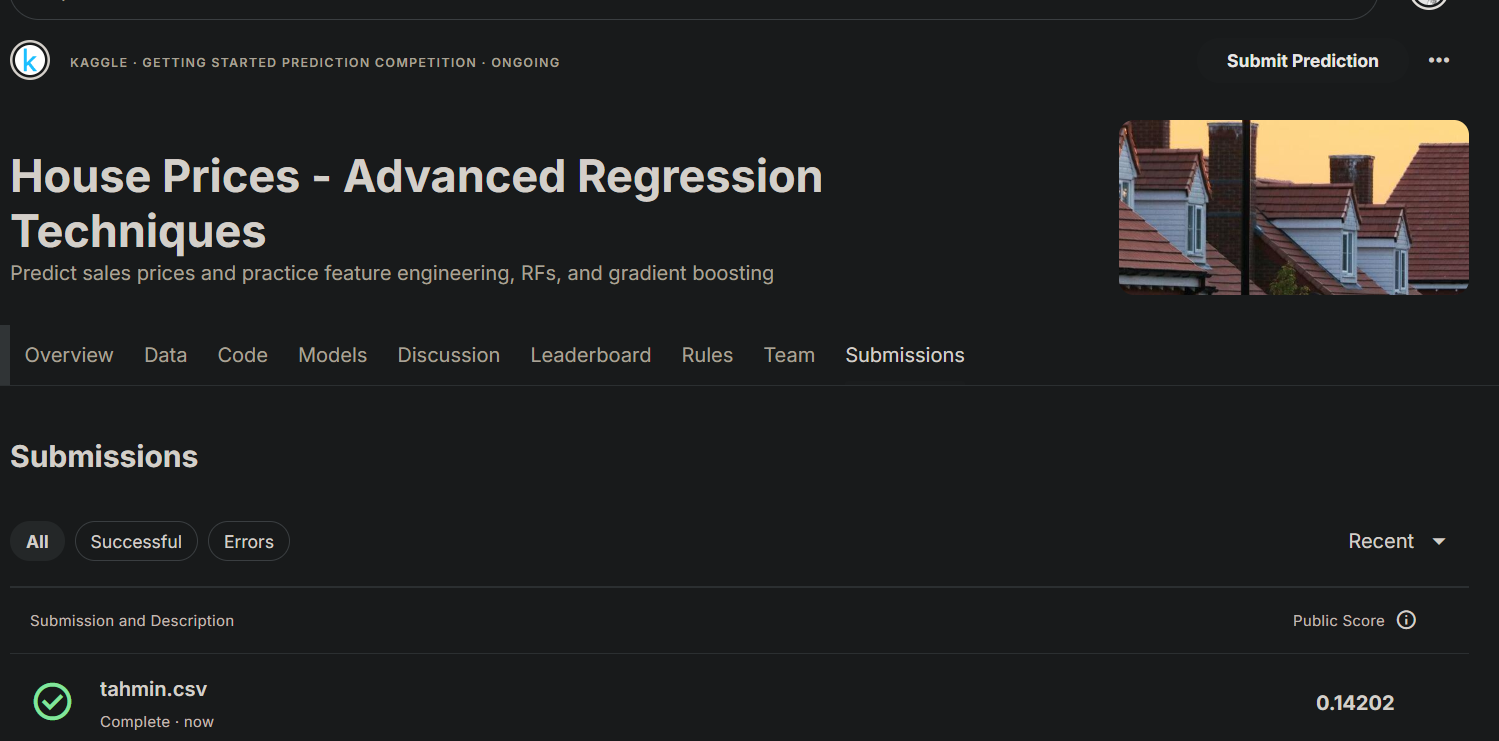

In [139]:
from IPython.display import Image
Image(filename='Screenshot_1.png')

In [ ]:
# Tahminin ilk 5 satırını okuyalım

In [140]:
tahmin_df = pd.read_csv('tahmin.csv')

In [141]:
id_column = tahmin_df['Id']
sale_price_column = tahmin_df['SalePrice']

In [142]:
print(tahmin_df[['Id', 'SalePrice']].head())

     Id      SalePrice
0  1461  118199.419221
1  1462  153284.838570
2  1463  167819.600229
3  1464  181663.679460
4  1465  196607.114705


In [144]:
#Şeyda ARI'nın projesinden destek alınmıştır.